<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: MIRI LRS Slitless spectroscopy
# Step: photom() in Spec2Pipeline

<span style="color:red"> **Instruments Affected**</span>: MIRI 

### Table of Contents
<div style="text-align: left"> 

<br> [Imports](#imports_ID) <br> [Introduction](#intro_ID) <br> [Get Documentaion String for Markdown Blocks](#markdown_from_docs) <br> [Loading Data](#data_ID) <br> [Run JWST Pipeline](#pipeline_ID) <br> [Create Figure or Print Output](#residual_ID) <br> [About This Notebook](#about_ID) <br>

</div>

In [1]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory.
from tempfile import TemporaryDirectory
import os
data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

<a id="imports_ID"></a>
# Imports
List the library imports and why they are relevant to this notebook.


* os for simple operating system functions
* glob for file finding
* gwcs.wcstools for bounding box operations
* astropy.io for opening fits files
* inspect to get the docstring of our objects.
* IPython.display for printing markdown output
* jwst.datamodels for building model for JWST Pipeline
* jwst.module.PipelineStep is the pipeline step being tested
* Various pipeline steps
* Various datamodels
* matplotlib.pyplot to generate plot
* matplotlib.patches to plot shapes
* crds for retrieving a reference file
* scipy interpolate
* ci_watson for data retrieval from artifactory


[Top of Page](#title_ID)

In [2]:
from ci_watson.artifactory_helpers import get_bigdata
from astropy.io import fits
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, collect_pipeline_cfgs
from jwst.pipeline import Spec2Pipeline
from jwst.background import BackgroundStep
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
from jwst.flatfield import FlatFieldStep
from jwst.photom import PhotomStep
from scipy import interpolate
from jwst.datamodels import ImageModel, CubeModel, RampModel
import crds
import os
import glob
from jwst import datamodels
from gwcs.wcstools import grid_from_bounding_box

In [3]:
Slitlessfile = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_tso3',
                                    'tso3_miri_test',
                                    'pipetest_miri_lrs_tso_100G10I.fits')

configfile = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_tso3',
                                    'tso3_miri_test',
                                    'calwebb_tso-spec2.cfg')

In [4]:
# Box file location:
det1 = Detector1Pipeline.call(Slitlessfile, save_results=True)

2021-08-21 05:10:28,172 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: /grp/crds/cache/references/jwst/jwst_miri_pars-detector1pipeline_0002.asdf


2021-08-21 05:10:28,192 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-08-21 05:10:28,194 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-08-21 05:10:28,196 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-08-21 05:10:28,197 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-08-21 05:10:28,199 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-08-21 05:10:28,200 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-08-21 05:10:28,201 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-08-21 05:10:28,202 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-08-21 05:10:28,203 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-08-21 05:10:28,204 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-08-21 05:10:28,205 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-08-21 05:10:28,206 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-08-21 05:10:28,207 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-08-21 05:10:28,208 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-08-21 05:10:28,209 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-08-21 05:10:28,210 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-08-21 05:10:28,213 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


2021-08-21 05:10:28,378 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup/pipetest_miri_lrs_tso_100G10I.fits',).


2021-08-21 05:10:28,389 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': True, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output

2021-08-21 05:10:28,636 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'pipetest_miri_lrs_tso_100G10I.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'readnoise', 'refpix', 'reset', 'saturation', 'superbias']


2021-08-21 05:10:28,643 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_miri_dark_0048.fits'.


2021-08-21 05:10:28,645 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits'.


2021-08-21 05:10:28,647 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits'.


2021-08-21 05:10:28,649 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_miri_mask_0028.fits'.


2021-08-21 05:10:28,651 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_miri_readnoise_0070.fits'.


2021-08-21 05:10:28,653 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.


2021-08-21 05:10:28,653 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is '/grp/crds/cache/references/jwst/jwst_miri_reset_0043.fits'.


2021-08-21 05:10:28,655 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_miri_saturation_0026.fits'.


2021-08-21 05:10:28,657 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.


2021-08-21 05:10:28,658 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-08-21 05:10:29,028 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:29,030 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:29,251 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES=1 is a power of 2; correction not needed


2021-08-21 05:10:29,252 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-08-21 05:10:29,254 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-08-21 05:10:29,379 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:29,382 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:29,404 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_miri_mask_0028.fits


2021-08-21 05:10:29,797 - stpipe.Detector1Pipeline.dq_init - INFO - Extracting mask subarray to match science data


2021-08-21 05:10:29,807 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-08-21 05:10:29,961 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:29,964 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:29,984 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_miri_saturation_0026.fits


2021-08-21 05:10:30,237 - stpipe.Detector1Pipeline.saturation - INFO - Extracting reference file subarray to match science data


2021-08-21 05:10:30,482 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 saturated pixels


2021-08-21 05:10:30,497 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-08-21 05:10:30,504 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-08-21 05:10:30,637 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:30,639 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:30,640 - stpipe.Detector1Pipeline.ipc - INFO - Step skipped.


2021-08-21 05:10:30,641 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-08-21 05:10:30,738 - stpipe.Detector1Pipeline.firstframe - INFO - Step firstframe running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:30,740 - stpipe.Detector1Pipeline.firstframe - INFO - Step firstframe parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:30,741 - stpipe.Detector1Pipeline.firstframe - INFO - Step skipped.


2021-08-21 05:10:30,743 - stpipe.Detector1Pipeline.firstframe - INFO - Step firstframe done


2021-08-21 05:10:30,838 - stpipe.Detector1Pipeline.lastframe - INFO - Step lastframe running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:30,840 - stpipe.Detector1Pipeline.lastframe - INFO - Step lastframe parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:30,841 - stpipe.Detector1Pipeline.lastframe - INFO - Step skipped.


2021-08-21 05:10:30,844 - stpipe.Detector1Pipeline.lastframe - INFO - Step lastframe done


2021-08-21 05:10:30,934 - stpipe.Detector1Pipeline.reset - INFO - Step reset running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:30,936 - stpipe.Detector1Pipeline.reset - INFO - Step reset parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:30,956 - stpipe.Detector1Pipeline.reset - INFO - Using RESET reference file /grp/crds/cache/references/jwst/jwst_miri_reset_0043.fits


2021-08-21 05:10:30,984 - stpipe.Detector1Pipeline.reset - WARNING - Keyword RESET_LARGE does not correspond to an existing DQ mnemonic, so will be ignored


2021-08-21 05:10:31,265 - stpipe.Detector1Pipeline.reset - INFO - Step reset done


2021-08-21 05:10:31,425 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:31,427 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:10:31,447 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits


2021-08-21 05:10:31,728 - stpipe.Detector1Pipeline.linearity - INFO - Extracting linearity subarray to match science data


2021-08-21 05:10:31,973 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-08-21 05:10:32,100 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:32,103 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup', 'type': 'baseline'}


2021-08-21 05:10:32,104 - stpipe.Detector1Pipeline.rscd - INFO - Step skipped.


2021-08-21 05:10:32,106 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done


2021-08-21 05:10:32,203 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:32,205 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup', 'dark_output': None}


2021-08-21 05:10:32,226 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_miri_dark_0048.fits


2021-08-21 05:10:32,551 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=10, ngroups=100, nframes=1, groupgap=0


2021-08-21 05:10:32,553 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=2, ngroups=1000, nframes=1, groupgap=0


2021-08-21 05:10:32,918 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-08-21 05:10:33,093 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:33,095 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-08-21 05:10:33,104 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = True


2021-08-21 05:10:33,105 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = True


2021-08-21 05:10:33,105 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = 11


2021-08-21 05:10:33,106 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = 1.000000


2021-08-21 05:10:33,106 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True


2021-08-21 05:10:33,369 - stpipe.Detector1Pipeline.refpix - WARNING - Refpix correction skipped for MIRI subarrays


2021-08-21 05:10:33,372 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-08-21 05:10:33,491 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).


2021-08-21 05:10:33,493 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup', 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0}


2021-08-21 05:10:33,502 - stpipe.Detector1Pipeline.jump - INFO - CR rejection threshold = 4 sigma


2021-08-21 05:10:33,518 - stpipe.Detector1Pipeline.jump - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits


2021-08-21 05:10:33,546 - stpipe.Detector1Pipeline.jump - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_miri_readnoise_0070.fits


2021-08-21 05:10:33,563 - stpipe.Detector1Pipeline.jump - INFO - Using 1 core for jump detection 


2021-08-21 05:10:33,770 - stpipe.Detector1Pipeline.jump - INFO - Extracting gain subarray to match science data


2021-08-21 05:10:33,858 - stpipe.Detector1Pipeline.jump - INFO - Executing two-point difference method


2021-08-21 05:10:34,078 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:


2021-08-21 05:10:34,228 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4166 pixels with at least one CR and at least four groups


2021-08-21 05:10:34,233 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:34,234 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:34,458 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:


2021-08-21 05:10:34,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4287 pixels with at least one CR and at least four groups


2021-08-21 05:10:34,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:34,611 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:34,829 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:


2021-08-21 05:10:34,954 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4333 pixels with at least one CR and at least four groups


2021-08-21 05:10:34,955 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:34,956 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:35,179 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:


2021-08-21 05:10:35,334 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4248 pixels with at least one CR and at least four groups


2021-08-21 05:10:35,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:35,336 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:35,542 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:


2021-08-21 05:10:35,669 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4267 pixels with at least one CR and at least four groups


2021-08-21 05:10:35,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:35,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:35,883 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 6:


2021-08-21 05:10:36,038 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4309 pixels with at least one CR and at least four groups


2021-08-21 05:10:36,039 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:36,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:36,250 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 7:


2021-08-21 05:10:36,375 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4266 pixels with at least one CR and at least four groups


2021-08-21 05:10:36,376 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:36,377 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:36,589 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 8:


2021-08-21 05:10:36,754 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4286 pixels with at least one CR and at least four groups


2021-08-21 05:10:36,755 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:36,755 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:36,962 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 9:


2021-08-21 05:10:37,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4270 pixels with at least one CR and at least four groups


2021-08-21 05:10:37,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:37,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:37,319 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 10:


2021-08-21 05:10:37,475 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 4285 pixels with at least one CR and at least four groups


2021-08-21 05:10:37,476 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and three groups


2021-08-21 05:10:37,477 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 0 pixels with at least one CR and two groups


2021-08-21 05:10:37,695 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 3.8364 sec


2021-08-21 05:10:37,701 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 4.198233


2021-08-21 05:10:37,704 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-08-21 05:10:37,984 - stpipe.Detector1Pipeline - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_ramp.fits


2021-08-21 05:10:38,138 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I_ramp.fits>,).


2021-08-21 05:10:38,140 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-08-21 05:10:38,169 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_miri_readnoise_0070.fits


2021-08-21 05:10:38,186 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits


2021-08-21 05:10:38,203 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-08-21 05:10:38,204 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-08-21 05:10:38,205 - stpipe.Detector1Pipeline.ramp_fit - INFO - Extracting gain subarray to match science data


2021-08-21 05:10:38,207 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 0


2021-08-21 05:11:53,071 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 100


2021-08-21 05:11:53,074 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 10


2021-08-21 05:11:53,165 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-08-21 05:11:53,296 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(416, 72) from pipetest_miri_lrs_tso_100G10I_ramp.fits>,).


2021-08-21 05:11:53,298 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:11:53,354 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-08-21 05:11:53,355 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-08-21 05:11:53,358 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-08-21 05:11:53,442 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_ramp.fits>,).


2021-08-21 05:11:53,444 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpwwczixup'}


2021-08-21 05:11:53,478 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-08-21 05:11:53,478 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-08-21 05:11:53,481 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-08-21 05:11:53,541 - stpipe.Detector1Pipeline - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_rateints.fits


2021-08-21 05:11:53,542 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-08-21 05:11:53,589 - stpipe.Detector1Pipeline - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_rate.fits


2021-08-21 05:11:53,590 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


In [5]:
rifile = glob.glob('pipetest*_rateints.fits')
print(rifile)

det1_ints = datamodels.open(rifile[0])

['pipetest_miri_lrs_tso_100G10I_rateints.fits']


In [6]:
sp2 = Spec2Pipeline.call(det1_ints, config_file='calwebb_tso-spec2.cfg', steps={'flat_field': {'save_results': True}, 'extract_1d': {'skip': True}})
print(sp2)

2021-08-21 05:11:53,830 - stpipe - INFO - PARS-SPEC2PIPELINE parameters found: /grp/crds/cache/references/jwst/jwst_miri_pars-spec2pipeline_0001.asdf


2021-08-21 05:11:53,841 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/config_parser.py:118: ResourceWarning: unclosed file <_io.BufferedReader name='calwebb_tso-spec2.cfg'>
  return ConfigObj(config_file, raise_errors=True)



2021-08-21 05:11:53,853 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.


2021-08-21 05:11:53,855 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.


2021-08-21 05:11:53,856 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.


2021-08-21 05:11:53,857 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.


2021-08-21 05:11:53,859 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.


2021-08-21 05:11:53,860 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.


2021-08-21 05:11:53,863 - stpipe.Spec2Pipeline.master_background - INFO - MasterBackgroundNrsSlitsStep instance created.


2021-08-21 05:11:53,864 - stpipe.Spec2Pipeline.master_background.flat_field - INFO - FlatFieldStep instance created.


2021-08-21 05:11:53,866 - stpipe.Spec2Pipeline.master_background.pathloss - INFO - PathLossStep instance created.


2021-08-21 05:11:53,867 - stpipe.Spec2Pipeline.master_background.barshadow - INFO - BarShadowStep instance created.


2021-08-21 05:11:53,868 - stpipe.Spec2Pipeline.master_background.photom - INFO - PhotomStep instance created.


2021-08-21 05:11:53,869 - stpipe.Spec2Pipeline.wavecorr - INFO - WavecorrStep instance created.


2021-08-21 05:11:53,871 - stpipe.Spec2Pipeline.flat_field - INFO - FlatFieldStep instance created.


2021-08-21 05:11:53,872 - stpipe.Spec2Pipeline.srctype - INFO - SourceTypeStep instance created.


2021-08-21 05:11:53,873 - stpipe.Spec2Pipeline.straylight - INFO - StraylightStep instance created.


2021-08-21 05:11:53,875 - stpipe.Spec2Pipeline.fringe - INFO - FringeStep instance created.


2021-08-21 05:11:53,876 - stpipe.Spec2Pipeline.pathloss - INFO - PathLossStep instance created.


2021-08-21 05:11:53,877 - stpipe.Spec2Pipeline.barshadow - INFO - BarShadowStep instance created.


2021-08-21 05:11:53,878 - stpipe.Spec2Pipeline.photom - INFO - PhotomStep instance created.


2021-08-21 05:11:53,880 - stpipe.Spec2Pipeline.resample_spec - INFO - ResampleSpecStep instance created.


2021-08-21 05:11:53,882 - stpipe.Spec2Pipeline.cube_build - INFO - CubeBuildStep instance created.


2021-08-21 05:11:53,883 - stpipe.Spec2Pipeline.extract_1d - INFO - Extract1dStep instance created.


2021-08-21 05:11:53,994 - stpipe.Spec2Pipeline - INFO - Step Spec2Pipeline running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>,).


2021-08-21 05:11:54,007 - stpipe.Spec2Pipeline - INFO - Step Spec2Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_bsub': False, 'fail_on_exception': True, 'steps': {'bkg_subtract': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None}, 'assign_wcs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '',

2021-08-21 05:11:54,017 - stpipe.Spec2Pipeline - INFO - Prefetching reference files for dataset: 'pipetest_miri_lrs_tso_100G10I_rateints.fits' reftypes = ['area', 'barshadow', 'camera', 'collimator', 'cubepar', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'fringe', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'msaoper', 'ote', 'pathloss', 'photom', 'regions', 'resol', 'sflat', 'specwcs', 'wavecorr', 'wavelengthrange', 'wfssbkg']


2021-08-21 05:11:54,024 - stpipe.Spec2Pipeline - INFO - Prefetch for AREA reference file is 'N/A'.


2021-08-21 05:11:54,024 - stpipe.Spec2Pipeline - INFO - Prefetch for BARSHADOW reference file is 'N/A'.


2021-08-21 05:11:54,025 - stpipe.Spec2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.


2021-08-21 05:11:54,026 - stpipe.Spec2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2021-08-21 05:11:54,026 - stpipe.Spec2Pipeline - INFO - Prefetch for CUBEPAR reference file is 'N/A'.


2021-08-21 05:11:54,027 - stpipe.Spec2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.


2021-08-21 05:11:54,027 - stpipe.Spec2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.


2021-08-21 05:11:54,028 - stpipe.Spec2Pipeline - INFO - Prefetch for DISTORTION reference file is '/grp/crds/cache/references/jwst/jwst_miri_distortion_0028.asdf'.


2021-08-21 05:11:54,030 - stpipe.Spec2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits'.


2021-08-21 05:11:54,032 - stpipe.Spec2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.


2021-08-21 05:11:54,033 - stpipe.Spec2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is 'N/A'.


2021-08-21 05:11:54,033 - stpipe.Spec2Pipeline - INFO - Prefetch for FLAT reference file is '/grp/crds/cache/references/jwst/jwst_miri_flat_0473.fits'.


2021-08-21 05:11:54,035 - stpipe.Spec2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.


2021-08-21 05:11:54,036 - stpipe.Spec2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.


2021-08-21 05:11:54,036 - stpipe.Spec2Pipeline - INFO - Prefetch for FRINGE reference file is 'N/A'.


2021-08-21 05:11:54,036 - stpipe.Spec2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.


2021-08-21 05:11:54,037 - stpipe.Spec2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.


2021-08-21 05:11:54,037 - stpipe.Spec2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.


2021-08-21 05:11:54,037 - stpipe.Spec2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.


2021-08-21 05:11:54,038 - stpipe.Spec2Pipeline - INFO - Prefetch for MSAOPER reference file is 'N/A'.


2021-08-21 05:11:54,038 - stpipe.Spec2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.


2021-08-21 05:11:54,038 - stpipe.Spec2Pipeline - INFO - Prefetch for PATHLOSS reference file is 'N/A'.


2021-08-21 05:11:54,039 - stpipe.Spec2Pipeline - INFO - Prefetch for PHOTOM reference file is '/grp/crds/cache/references/jwst/jwst_miri_photom_0071.fits'.


2021-08-21 05:11:54,041 - stpipe.Spec2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.


2021-08-21 05:11:54,041 - stpipe.Spec2Pipeline - INFO - Prefetch for RESOL reference file is 'N/A'.


2021-08-21 05:11:54,042 - stpipe.Spec2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.


2021-08-21 05:11:54,042 - stpipe.Spec2Pipeline - INFO - Prefetch for SPECWCS reference file is '/grp/crds/cache/references/jwst/jwst_miri_specwcs_0003.fits'.


2021-08-21 05:11:54,044 - stpipe.Spec2Pipeline - INFO - Prefetch for WAVECORR reference file is 'N/A'.


2021-08-21 05:11:54,044 - stpipe.Spec2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.


2021-08-21 05:11:54,044 - stpipe.Spec2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.


2021-08-21 05:11:54,045 - stpipe.Spec2Pipeline - INFO - Starting calwebb_spec2 ...


2021-08-21 05:11:54,077 - stpipe.Spec2Pipeline - INFO - Processing product pipetest_miri_lrs_tso_100G10I_rateints


2021-08-21 05:11:54,078 - stpipe.Spec2Pipeline - INFO - Working on input <CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits> ...


2021-08-21 05:11:54,167 - stpipe.Spec2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>,).


2021-08-21 05:11:54,169 - stpipe.Spec2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-08-21 05:11:54,463 - stpipe.Spec2Pipeline.assign_wcs - INFO - Created a MIRI mir_lrs-slitless pipeline with references {'distortion': '/grp/crds/cache/references/jwst/jwst_miri_distortion_0028.asdf', 'filteroffset': None, 'specwcs': '/grp/crds/cache/references/jwst/jwst_miri_specwcs_0003.fits', 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-08-21 05:11:54,526 - stpipe.Spec2Pipeline.assign_wcs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-08-21 05:11:54,533 - stpipe.Spec2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  0.000981120 -0.000094311 0.000981120 0.000098852 359.998963682 0.000098852 359.998963682 -0.000094311


2021-08-21 05:11:54,534 - stpipe.Spec2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  0.000981120 -0.000094311 0.000981120 0.000098852 359.998963682 0.000098852 359.998963682 -0.000094311


2021-08-21 05:11:54,534 - stpipe.Spec2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs


2021-08-21 05:11:54,540 - stpipe.Spec2Pipeline.assign_wcs - INFO - Step assign_wcs done


2021-08-21 05:11:54,633 - stpipe.Spec2Pipeline.bkg_subtract - INFO - Step bkg_subtract running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>, []).


2021-08-21 05:11:54,635 - stpipe.Spec2Pipeline.bkg_subtract - INFO - Step bkg_subtract parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None}


2021-08-21 05:11:54,636 - stpipe.Spec2Pipeline.bkg_subtract - INFO - Step skipped.


2021-08-21 05:11:54,637 - stpipe.Spec2Pipeline.bkg_subtract - INFO - Step bkg_subtract done


2021-08-21 05:11:54,721 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>, []).


2021-08-21 05:11:54,723 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-08-21 05:11:54,723 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step skipped.


2021-08-21 05:11:54,725 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract done


2021-08-21 05:11:54,804 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>,).


2021-08-21 05:11:54,806 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-08-21 05:11:54,807 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step skipped.


2021-08-21 05:11:54,808 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging done


2021-08-21 05:11:54,884 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>,).


2021-08-21 05:11:54,886 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-08-21 05:11:54,894 - stpipe.Spec2Pipeline.srctype - INFO - Input EXP_TYPE is MIR_LRS-SLITLESS


2021-08-21 05:11:54,895 - stpipe.Spec2Pipeline.srctype - INFO - Input SRCTYAPT = None


2021-08-21 05:11:54,895 - stpipe.Spec2Pipeline.srctype - WARNING - SRCTYAPT keyword not found in input; using SRCTYPE instead


2021-08-21 05:11:54,896 - stpipe.Spec2Pipeline.srctype - INFO - Input is a TSO exposure; setting SRCTYPE = POINT


2021-08-21 05:11:54,898 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype done


2021-08-21 05:11:54,978 - stpipe.Spec2Pipeline.flat_field - INFO - Step flat_field running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_rateints.fits>,).


2021-08-21 05:11:54,979 - stpipe.Spec2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}


2021-08-21 05:11:55,049 - stpipe.Spec2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored


2021-08-21 05:11:55,050 - stpipe.Spec2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored


2021-08-21 05:11:55,050 - stpipe.Spec2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored


2021-08-21 05:11:55,052 - stpipe.Spec2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored


2021-08-21 05:11:55,264 - stpipe.Spec2Pipeline.flat_field - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_flat_field.fits


2021-08-21 05:11:55,265 - stpipe.Spec2Pipeline.flat_field - INFO - Step flat_field done


2021-08-21 05:11:55,355 - stpipe.Spec2Pipeline.straylight - INFO - Step straylight running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_flat_field.fits>,).


2021-08-21 05:11:55,356 - stpipe.Spec2Pipeline.straylight - INFO - Step straylight parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'method': 'ModShepard', 'roi': 50, 'power': 1.0}


2021-08-21 05:11:55,357 - stpipe.Spec2Pipeline.straylight - INFO - Step skipped.


2021-08-21 05:11:55,358 - stpipe.Spec2Pipeline.straylight - INFO - Step straylight done


2021-08-21 05:11:55,438 - stpipe.Spec2Pipeline.fringe - INFO - Step fringe running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_flat_field.fits>,).


2021-08-21 05:11:55,440 - stpipe.Spec2Pipeline.fringe - INFO - Step fringe parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-08-21 05:11:55,441 - stpipe.Spec2Pipeline.fringe - INFO - Step skipped.


2021-08-21 05:11:55,442 - stpipe.Spec2Pipeline.fringe - INFO - Step fringe done


2021-08-21 05:11:55,521 - stpipe.Spec2Pipeline.pathloss - INFO - Step pathloss running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_flat_field.fits>,).


2021-08-21 05:11:55,523 - stpipe.Spec2Pipeline.pathloss - INFO - Step pathloss parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}


2021-08-21 05:11:55,523 - stpipe.Spec2Pipeline.pathloss - INFO - Step skipped.


2021-08-21 05:11:55,525 - stpipe.Spec2Pipeline.pathloss - INFO - Step pathloss done


2021-08-21 05:11:55,603 - stpipe.Spec2Pipeline.barshadow - INFO - Step barshadow running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_flat_field.fits>,).


2021-08-21 05:11:55,605 - stpipe.Spec2Pipeline.barshadow - INFO - Step barshadow parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}


2021-08-21 05:11:55,606 - stpipe.Spec2Pipeline.barshadow - INFO - Step skipped.


2021-08-21 05:11:55,607 - stpipe.Spec2Pipeline.barshadow - INFO - Step barshadow done


2021-08-21 05:11:55,685 - stpipe.Spec2Pipeline.photom - INFO - Step photom running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_flat_field.fits>,).


2021-08-21 05:11:55,686 - stpipe.Spec2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}


2021-08-21 05:11:55,712 - stpipe.Spec2Pipeline.photom - INFO - Using photom reference file: /grp/crds/cache/references/jwst/jwst_miri_photom_0071.fits


2021-08-21 05:11:55,713 - stpipe.Spec2Pipeline.photom - INFO - Using area reference file: N/A


2021-08-21 05:11:55,792 - stpipe.Spec2Pipeline.photom - INFO - Using instrument: MIRI


2021-08-21 05:11:55,793 - stpipe.Spec2Pipeline.photom - INFO -  detector: MIRIMAGE


2021-08-21 05:11:55,793 - stpipe.Spec2Pipeline.photom - INFO -  exp_type: MIR_LRS-SLITLESS


2021-08-21 05:11:55,794 - stpipe.Spec2Pipeline.photom - INFO -  filter: P750L


2021-08-21 05:11:55,815 - stpipe.Spec2Pipeline.photom - INFO -  subarray: SLITLESSPRISM


2021-08-21 05:11:55,816 - stpipe.Spec2Pipeline.photom - INFO - PHOTMJSR value: 35.2495


2021-08-21 05:11:55,840 - stpipe.Spec2Pipeline.photom - INFO - Step photom done


2021-08-21 05:11:55,934 - stpipe.Spec2Pipeline.extract_1d - INFO - Step extract_1d running with args (<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_calints.fits>,).


2021-08-21 05:11:55,936 - stpipe.Spec2Pipeline.extract_1d - INFO - Step extract_1d parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': 'x1dints', 'search_output_file': True, 'input_dir': '', 'smoothing_length': None, 'bkg_fit': 'poly', 'bkg_order': None, 'bkg_sigma_clip': 3.0, 'log_increment': 50, 'subtract_background': None, 'use_source_posn': None, 'apply_apcorr': True}


2021-08-21 05:11:55,937 - stpipe.Spec2Pipeline.extract_1d - INFO - Step skipped.


2021-08-21 05:11:55,938 - stpipe.Spec2Pipeline.extract_1d - INFO - Step extract_1d done


2021-08-21 05:11:55,938 - stpipe.Spec2Pipeline - INFO - Finished processing product pipetest_miri_lrs_tso_100G10I_rateints


2021-08-21 05:11:55,939 - stpipe.Spec2Pipeline - INFO - Ending calwebb_spec2


2021-08-21 05:11:56,073 - stpipe.Spec2Pipeline - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_calints.fits


2021-08-21 05:11:56,074 - stpipe.Spec2Pipeline - INFO - Step Spec2Pipeline done


[<CubeModel(10, 416, 72) from pipetest_miri_lrs_tso_100G10I_calints.fits>]


2021-08-21 05:11:56,231 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/ipykernel_3450215/1810153987.py:13: RuntimeWarning: invalid value encountered in true_divide
  ax[2].imshow(sp2[0].data[0,:,:]/ff.data[0,:,:], origin='lower', interpolation='None')



1
['pipetest_miri_lrs_tso_100G10I_flat_field.fits']


Text(0.5, 1.0, 'calints/ff, Int 1')

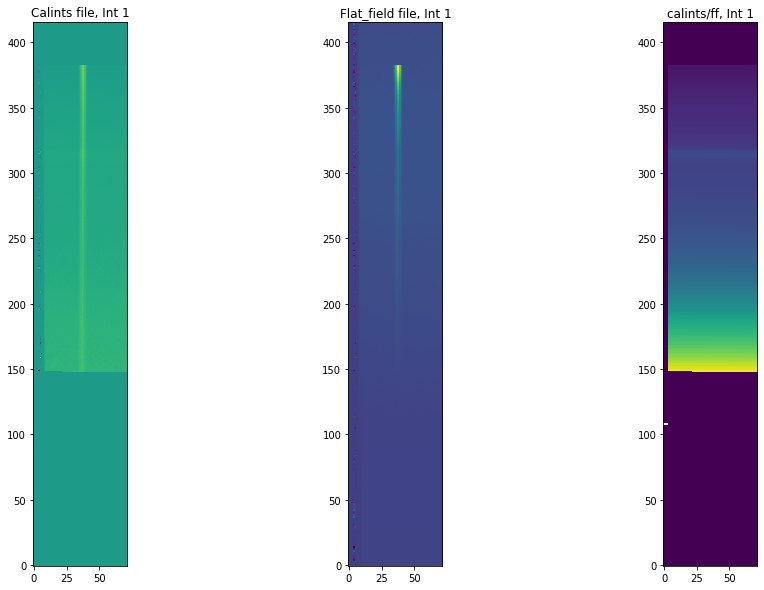

In [7]:
print(len(sp2))
ffile = glob.glob('pipetest*_flat_field.fits')
print(ffile)

ff = datamodels.open(ffile[0])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[16,10])
ax[0].imshow(sp2[0].data[0,:,:], origin='lower', interpolation='None')
ax[0].set_title('Calints file, Int 1')

ax[1].imshow(ff.data[0,:,:], origin='lower', interpolation='None')
ax[1].set_title('Flat_field file, Int 1')

ax[2].imshow(sp2[0].data[0,:,:]/ff.data[0,:,:], origin='lower', interpolation='None')
ax[2].set_title('calints/ff, Int 1')

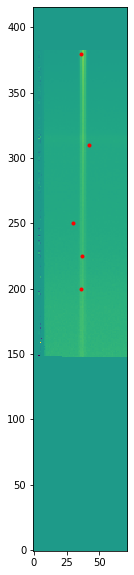

[array(5.15320404), array(10.94665985), array(10.3880848), array(8.09935636), array(9.78794071)]


In [8]:
pho = sp2[0]
point1 = (36,380)
ra1, dec1, wave1 = pho.meta.wcs(point1[0],point1[1])
point2 = (36,200)
ra2, dec2, wave2 = pho.meta.wcs(point2[0],point2[1])
point3 = (37,225)
ra3, dec3, wave3 = pho.meta.wcs(point3[0],point3[1])
point4 = (42,310)
ra4, dec4, wave4 = pho.meta.wcs(point4[0],point4[1])
point5 = (30,250)
ra5, dec5, wave5 = pho.meta.wcs(point5[0],point5[1])
fig = plt.figure(figsize=[4,10])
plt.imshow(pho.data[0], origin='lower', interpolation='None')
plt.plot([point1[0],point2[0],point3[0],point4[0],point5[0]],[point1[1],point2[1],point3[1],point4[1],point5[1]],'.', color='r')
plt.show()
xpts = [point1[0], point2[0], point3[0], point4[0], point5[0]]
ypts = [point1[1], point2[1], point3[1], point4[1], point5[1]]

waves = [wave1, wave2, wave3, wave4, wave5]
print(waves)

In [9]:
phoreffile = pho.meta.ref_file.photom.name
file = phoreffile.split("/")[2]
basename = crds.core.config.pop_crds_uri(phoreffile)
path = crds.locate_file(basename, "jwst")
reffile = datamodels.open(path)
print(phoreffile)

crds://jwst_miri_photom_0071.fits


In [10]:
wavelocs = []
relresp = []


wloc = [np.argmin(np.abs(reffile.phot_table['wavelength'] - ww)) for ww in waves]
wmatch = [reffile.phot_table['wavelength'][0,ll] for ll in wloc]
wmatch_plus = [reffile.phot_table['wavelength'][0,ll+1] for ll in wloc]
wmatch_minus = [reffile.phot_table['wavelength'][0,ll-1] for ll in wloc]
relresp = [reffile.phot_table['relresponse'][0,ll] for ll in wloc]
print(relresp)

[0.5033188, 3.7477894, 2.585046, 1.5743923, 2.0205958]


2021-08-21 05:11:56,686 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/ipykernel_3450215/1750316104.py:15: RuntimeWarning: invalid value encountered in true_divide
  ref_ratio = sp2[0].data[0,6:397,:]/ff.data[0,6:397,:]



((3.5, 71.5), (6.5, 397.5))


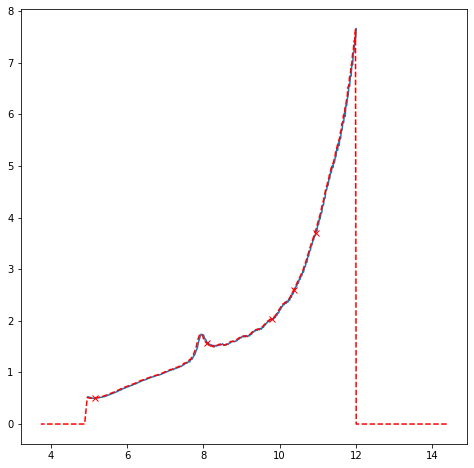

In [11]:
f = interpolate.interp1d(reffile.phot_table['wavelength'][0,:], reffile.phot_table['relresponse'][0,:], assume_sorted=False)
iresp = [f(ww) for ww in waves]

print(pho.meta.wcs.bounding_box)

# plot for sanity check!
plt.figure(figsize=[8,8])
plt.plot(reffile.phot_table['wavelength'][0,:], reffile.phot_table['relresponse'][0,:])
plt.plot(waves, iresp, 'rx', label='interpolated points')


x,y = grid_from_bounding_box(pho.meta.wcs.bounding_box)
ra, dec, lam = pho.meta.wcs(x, y)

ref_ratio = sp2[0].data[0,6:397,:]/ff.data[0,6:397,:]
ref_ratio_av = np.mean(ref_ratio[:,25:45], axis=1)

lam_vec = np.mean(lam, axis=1)
plt.plot(lam_vec, ref_ratio_av/reffile.phot_table['photmjsr'][0], 'r--')
plt.show()

In [12]:
fconv = [reffile.phot_table['photmjsr'][0] * ir for ir in iresp]
print(fconv)

[17.691976395796363, 130.3850202516898, 91.40632416687826, 55.55319233912927, 71.4993599182671]


In [13]:
dratio = [pho.data[0,yy,xx]/ff.data[0,yy,xx] for xx,yy in zip(xpts, ypts)]

# print these numbers next to each other to see if they match
print('Ratio of data points     Calculated conversion factor')
for rr, fc in zip(dratio, fconv):
    print('{0:.5f}                {1:.5f}'.format(rr,fc))
    assert np.isclose(rr,fc, rtol=1e-6), "Numbers don't match to within 1e-6"

Ratio of data points     Calculated conversion factor
17.69198                17.69198
130.38503                130.38502
91.40633                91.40632
55.55319                55.55319
71.49936                71.49936


**If the assert test passes, the step is correctly implemented**

**Authors**
* K. Murray, kmurray@stsci.edu, MIRI Branch
* S. Kendrew, sarah.kendrew@esa.int, ESA/MIRI Branch

Last updated
Feb 1st 2021